In [3]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## Loading dan Review Data

In [5]:
#Read Dataset
df = pd.read_csv("diabetes.csv")

In [9]:
# Row & Col
df.shape

(768, 9)

In [7]:
#Show Ascending Data
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#Show Descinding Data
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [11]:
#Cek Data Null
df.isnull().values.any()

False

In [12]:
#Ploting Korelasi Data (Data Double)
def plot_corr(df, size=11):
    #Data Core Correlation
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

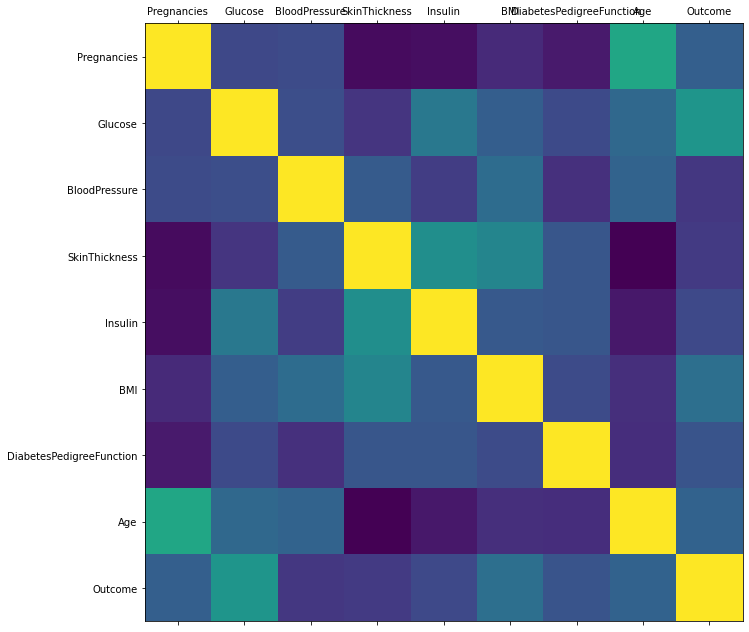

In [13]:
plot_corr(df)

In [14]:
#Cek Korelasi Data
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [15]:
#Cek Data type (pastikan semua data numeric)
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
#Jumlah distribusi

#Panjang data
num_obs = len(df)
#Cek jumlah true
num_true = len(df.loc[df['Outcome'] == 1])
#Cek Jumlah False
num_false = len(df.loc[df['Outcome'] == 0])
print("Jumlah terkena Diabetes : {0} ({1:2.2f}%)".format(num_true, (num_true/num_obs) * 100))
print("Jumlah tidak terkena Diabetes : {0} ({1:2.2f}%)".format(num_false, (num_false/num_obs) * 100))

Jumlah terkena Diabetes : 268 (34.90%)
Jumlah tidak terkena Diabetes : 500 (65.10%)


## Proses Training

In [23]:
#Split data
from sklearn.model_selection import train_test_split
feature_col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
predicted_class_names = ['Outcome']

X = df[feature_col_names].values
y = df[predicted_class_names].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

In [29]:
print("{0:0.2f}% ada pada training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% ada pada test set".format((len(X_test)/len(df.index)) * 100))

69.92% ada pada training set
30.08% ada pada test set


In [38]:
print("Jumlah Original terkena Diabetes : {0} ({1:2.2f}%)".format(len(df.loc[df['Outcome'] == 1]), (len(df.loc[df['Outcome'] == 1])/len(df.index)) * 100.0))
print("Jumlah Original tidak terkena Diabetes : {0} ({1:2.2f}%)".format(len(df.loc[df['Outcome'] == 0]), (len(df.loc[df['Outcome'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True : {0} ({1:2.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:2.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Training True : {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Training False : {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Jumlah Original terkena Diabetes : 268 (34.90%)
Jumlah Original tidak terkena Diabetes : 500 (65.10%)

Training True : 188 (35.01%)
Training False : 349 (64.99%)

Training True : 80 (34.63%)
Training False : 151 (65.37%)


In [39]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
print("# rows in datframe {0}".format(len(df)))
print("# rows missing Glucose: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("# rows missing BloodPressure: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("# rows missing SkinThickness: {0}".format(len(df.loc[df['SkinThickness'] == 0])))
print("# rows missing Insulin: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("# rows missing BMI: {0}".format(len(df.loc[df['BMI'] == 0])))
print("# rows missing DiabetesPedigreeFunction: {0}".format(len(df.loc[df['DiabetesPedigreeFunction'] == 0])))
print("# rows missing Age: {0}".format(len(df.loc[df['Age'] == 0])))

# rows in datframe 768
# rows missing Glucose: 5
# rows missing BloodPressure: 35
# rows missing SkinThickness: 227
# rows missing Insulin: 374
# rows missing BMI: 11
# rows missing DiabetesPedigreeFunction: 0
# rows missing Age: 0


In [43]:
#Impute Data yang kosong dengan min 
from sklearn.impute import SimpleImputer
fill_0 = SimpleImputer(missing_values = 0, strategy = "mean")
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

In [48]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Naive Bayes

In [49]:
#Training Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB()

In [51]:
# Test Akurasi Data Train
nb_predict_train = nb_model.predict(X_train)

from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

Accuracy: 0.7542


In [53]:
# Test Akurasi Data Uji
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics
print("nb_predict_test", nb_predict_test)
print("y_test", y_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_train)))

nb_predict_test [0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 0 0]
y_test [[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [

In [54]:
#Konfusion Matriks (Cek label)
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[118  33]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



### Random Forest Classifier

In [56]:
#Peningkatan peforma akurasi dengan RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 42, n_estimators = 10)
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(n_estimators=10, random_state=42)

In [57]:
#Prediksi Data train
rf_predict_train = rf_model.predict(X_train)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9870


In [58]:
#Prediksi Data Uji
rf_predict_test = rf_model.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.7100


In [ ]:
#Konfusion Matriks (Cek label)
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test)))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

### Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=0.7, random_state = 42, solver = 'liblinear', max_iter = 10000)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.7446
[[128  23]
 [ 36  44]]

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       151
           1       0.66      0.55      0.60        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



1st max value of 0.738 occured at C=0.300


Text(0, 0.5, 'Recall Score')

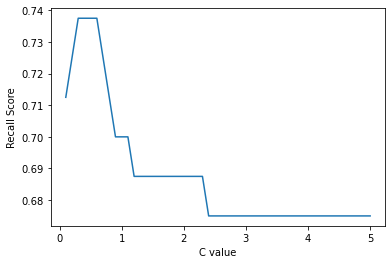

In [67]:
#Setting Regularisize Parameter, supaya semua kelas weightnya balance (terkena dan tidak terkena diabetes)
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C = C_val, class_weight = "balanced", random_state = 42, solver = 'liblinear', max_iter = 100)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if(recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("Recall Score")

In [69]:
#Kelas Weight yang sudah balance
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(class_weight = "balanced", C = best_score_C_val, random_state = 42, solver = 'liblinear')
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

#Training Matriks
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.7143
[[106  45]
 [ 21  59]]

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       151
           1       0.57      0.74      0.64        80

    accuracy                           0.71       231
   macro avg       0.70      0.72      0.70       231
weighted avg       0.74      0.71      0.72       231

0.7375


### Cross Validation

In [73]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs =- 1, random_state = 42, Cs = 3, cv = 10, refit = False, class_weight = "balanced", max_iter = 500)
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, max_iter=500,
                     n_jobs=-1, random_state=42, refit=False)

In [74]:
#Prediksi Test Data
lr_cv_predict_test = lr_cv_model.predict(X_test)

print("Acccuracy : {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Acccuracy : 0.7013
[[109  42]
 [ 27  53]]

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       151
           1       0.56      0.66      0.61        80

    accuracy                           0.70       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.70      0.71       231



In [79]:
#Simpan Model
import sklearn.externals
import joblib
joblib.dump(lr_cv_model, "kode-trained-model.pkl")

['kode-trained-model.pkl']

In [81]:
#Load Model
lr_cv_model = joblib.load("kode-trained-model.pkl")